In [4]:
from __future__ import print_function    # (at top of module)
import requests
from furl import furl
from math import ceil
%matplotlib inline
import time
import timeit
import pandas as pd
import numpy as np
import re
import spotipy
import sys
import os
import json
import pprint
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import spotipy.util as util
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [187]:
cid ="ae0dc287abd746f9bfc9fabb30966d0c" 
secret = "40c2e16da28c49e1839219c99e697910"
username= "Mohamad Eldebek"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

artist_name = []
track_name = []
track_id = [] 
popularity = []
album_name = []


for i in range(0,10000,50):
    track_results = sp.search(q='year:2018', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        album_name.append(t['album']['name'])
      



In [60]:
track_results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=year%3A2018&type=track&offset=9950&limit=50',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6qtECqesbU29iftyeWmldK'},
       'href': 'https://api.spotify.com/v1/artists/6qtECqesbU29iftyeWmldK',
       'id': '6qtECqesbU29iftyeWmldK',
       'name': 'Code Orange',
       'type': 'artist',
       'uri': 'spotify:artist:6qtECqesbU29iftyeWmldK'}],
     'available_markets': ['AD',
      'AE',
      'AR',
      'AT',
      'AU',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HU',
      'ID',
      'IE',
      'IL',
      'IS',
      'IT',
      'JO',
      'JP',
      'KW',


In [ ]:
# get the artist names with Albums name and run through the Api to get the genre and then merge into the Df. 

In [59]:
print('number of elements in the album_name list:', len(album_name))

number of elements in the album_name list: 10000


In [71]:
 # Get genres of artists
artist_genres = []     
for name in artist_name:
    genres = []
    artists = sp.search(q='artist:' + name, type='artist')
    genres.append(name)
    for i in range(len(artists['artists']['items'])):
        genre = artists['artists']['items'][i]['genres']
        if genre:
            genres.append(genre)

    artist_genres.append(genres)

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [168]:
artist_genres[0:10]

[['Post Malone', ['pop', 'rap']],
 ['Meek Mill',
  ['hip hop',
   'philly rap',
   'pop',
   'pop rap',
   'rap',
   'southern hip hop',
   'trap music']],
 ['YNW Melly', ['trap music']],
 ['Calboy', ['chicago rap', 'trap music']],
 ['Travis Scott', ['pop', 'pop rap', 'rap']],
 ['Halsey',
  ['dance pop',
   'electropop',
   'etherpop',
   'indie poptimism',
   'pop',
   'post-teen pop']],
 ['Marshmello', ['brostep', 'egyptian pop', 'progressive electro house']],
 ['Juice WRLD', ['chicago rap']],
 ['21 Savage', ['atl hip hop', 'rap', 'trap music']],
 ['Khalid', ['pop'], ['pakistani pop'], ['somali pop']]]

In [ ]:
# flatten series with list values to multiple rows
df_expand = pd.DataFrame(df.column.tolist(), index=df.id).stack().reset_index(name=column)[["column","id"]]

In [188]:
 # Get genres of albums
album_genres = []     
for genre in album_genres:
    genre = []
    album = album =sp.album(album_id="67zji6lHQFRF2mY4MOBD50")
    genres.append(genre)
    for i in range(len(album_id['genre']['items'])):
        genre = artists['genre']['items'][i]['genre']
        if genre:
            genres.append(genre)

    album_genres.append(genres)

In [197]:
album =sp.album(album_id="1NiFRjtKzHtLTX2yOGZ5Xm")
print(album)

{'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0CbJ7vhSBVagdeLhNcf9v1'}, 'href': 'https://api.spotify.com/v1/artists/0CbJ7vhSBVagdeLhNcf9v1', 'id': '0CbJ7vhSBVagdeLhNcf9v1', 'name': 'Reptaliens', 'type': 'artist', 'uri': 'spotify:artist:0CbJ7vhSBVagdeLhNcf9v1'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'copyrights': [{'text': '2018 Captured Tracks', 'type': 'C'}, {'text': '2018 Captured Tracks', 'type': 'P'}], 'external_ids': {'upc': '817949016784'}, 'external_urls': {'spotify': 'https

In [ ]:
album =sp.album(album_id="{}")
for loop to basically plug the id in the string and the rest if the fucntion will run th get the genre we need.

In [183]:
album_genres

[]

In [73]:
df_test = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'album_name': album_name,'artist_genres':artist_genres,'track_id':track_id,'popularity':popularity})
print(df_test.shape)
df_test.head()


(10000, 6)


,artist_name,track_name,album_name,artist_genres,track_id,popularity
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,"[Post Malone, [pop, rap]]",3KkXRkHbMCARz0aVfEt68P,94
1,Meek Mill,Going Bad (feat. Drake),Championships,"[Meek Mill, [hip hop, philly rap, pop, pop rap...",2IRZnDFmlqMuOrYOLnZZyc,89
2,YNW Melly,Murder On My Mind,I AM YOU,"[YNW Melly, [trap music]]",7eBqSVxrzQZtK2mmgRG6lC,88
3,Calboy,Envy Me,Envy Me,"[Calboy, [chicago rap, trap music]]",05t7JMip6JrLuSrMV5yYjX,86
4,Travis Scott,SICKO MODE,ASTROWORLD,"[Travis Scott, [pop, pop rap, rap]]",2xLMifQCjDGFmkHkpNLD9h,88


In [75]:
df_test.tail()

,artist_name,track_name,album_name,artist_genres,track_id,popularity
9995,Marko Silva,Aventurera,Aventurera,"[Marko Silva, [reggaeton flow]]",7i2UxP78Z8jpp6sB4DJIdH,50
9996,Aviators,Traveler's Song,Let There Be Fire,"[Aviators, [antiviral pop, otacore, pony], [sl...",0CqPcWjAzqyLh9vSdbl5pj,40
9997,Ripe,Ladies Night,Joy in the Wild Unknown,"[Ripe, [boston indie], [hamburg indie], [parag...",0MsusNWIqGvwCDWqVwcogZ,37
9998,Erra,Expiate,Neon,"[Erra, [alabama metal, deep melodic metalcore,...",1aTLFdpHgyAbF70gmJ1ytv,39
9999,The Interrupters,Be Gone,Fight the Good Fight,"[The Interrupters, [punk, ska, ska punk, skate...",23QpiOn5OMHSffLhg6jdxU,42


In [82]:
#measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_test['track_id']),batchsize):
    batch = df_test['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 16.663079753998318


In [83]:
print('number of elements in the track_id list:', len(rows))

number of elements in the track_id list: 10000


In [119]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (10000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.55600,https://api.spotify.com/v1/audio-analysis/3KkX...,0.760,158040,0.479,3KkXRkHbMCARz0aVfEt68P,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,0.913
1,0.25900,https://api.spotify.com/v1/audio-analysis/2IRZ...,0.889,180522,0.496,2IRZnDFmlqMuOrYOLnZZyc,0.000000,4,0.2520,-6.365,0,0.0905,86.003,4,https://api.spotify.com/v1/tracks/2IRZnDFmlqMu...,audio_features,spotify:track:2IRZnDFmlqMuOrYOLnZZyc,0.544
2,0.14500,https://api.spotify.com/v1/audio-analysis/7eBq...,0.759,268434,0.730,7eBqSVxrzQZtK2mmgRG6lC,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,https://api.spotify.com/v1/tracks/7eBqSVxrzQZt...,audio_features,spotify:track:7eBqSVxrzQZtK2mmgRG6lC,0.740
3,0.28200,https://api.spotify.com/v1/audio-analysis/05t7...,0.556,120137,0.481,05t7JMip6JrLuSrMV5yYjX,0.000000,11,0.2160,-7.663,1,0.3130,149.025,4,https://api.spotify.com/v1/tracks/05t7JMip6JrL...,audio_features,spotify:track:05t7JMip6JrLuSrMV5yYjX,0.581
4,0.00513,https://api.spotify.com/v1/audio-analysis/2xLM...,0.834,312820,0.730,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,0.446


In [120]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
acousticness        10000 non-null float64
analysis_url        10000 non-null object
danceability        10000 non-null float64
duration_ms         10000 non-null int64
energy              10000 non-null float64
id                  10000 non-null object
instrumentalness    10000 non-null float64
key                 10000 non-null int64
liveness            10000 non-null float64
loudness            10000 non-null float64
mode                10000 non-null int64
speechiness         10000 non-null float64
tempo               10000 non-null float64
time_signature      10000 non-null int64
track_href          10000 non-null object
type                10000 non-null object
uri                 10000 non-null object
valence             10000 non-null float64
dtypes: float64(9), int64(4), object(5)
memory usage: 1.4+ MB


In [121]:
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

In [122]:
df_audio_features.shape

(10000, 14)

In [123]:
df_audio_features.head()

,acousticness,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.55600,0.760,158040,0.479,3KkXRkHbMCARz0aVfEt68P,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,0.25900,0.889,180522,0.496,2IRZnDFmlqMuOrYOLnZZyc,0.000000,4,0.2520,-6.365,0,0.0905,86.003,4,0.544
2,0.14500,0.759,268434,0.730,7eBqSVxrzQZtK2mmgRG6lC,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,0.740
3,0.28200,0.556,120137,0.481,05t7JMip6JrLuSrMV5yYjX,0.000000,11,0.2160,-7.663,1,0.3130,149.025,4,0.581
4,0.00513,0.834,312820,0.730,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


In [124]:
df_audio_features.shape

(10000, 14)

In [136]:
# merge both dataframes
# the 'inner' method will make sure that we only keep track IDs present in both datasets
spotidata = pd.merge(df_test,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
spotidata.head()

Shape of the dataset: (10000, 14)


,artist_name,track_name,album_name,artist_genres,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,"[Post Malone, [pop, rap]]",3KkXRkHbMCARz0aVfEt68P,94,0.55600,0.760,158040,0.479,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,Meek Mill,Going Bad (feat. Drake),Championships,"[Meek Mill, [hip hop, philly rap, pop, pop rap...",2IRZnDFmlqMuOrYOLnZZyc,89,0.25900,0.889,180522,0.496,0.000000,4,0.2520,-6.365,0,0.0905,86.003,4,0.544
2,YNW Melly,Murder On My Mind,I AM YOU,"[YNW Melly, [trap music]]",7eBqSVxrzQZtK2mmgRG6lC,88,0.14500,0.759,268434,0.730,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,0.740
3,Calboy,Envy Me,Envy Me,"[Calboy, [chicago rap, trap music]]",05t7JMip6JrLuSrMV5yYjX,86,0.28200,0.556,120137,0.481,0.000000,11,0.2160,-7.663,1,0.3130,149.025,4,0.581
4,Travis Scott,SICKO MODE,ASTROWORLD,"[Travis Scott, [pop, pop rap, rap]]",2xLMifQCjDGFmkHkpNLD9h,88,0.00513,0.834,312820,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


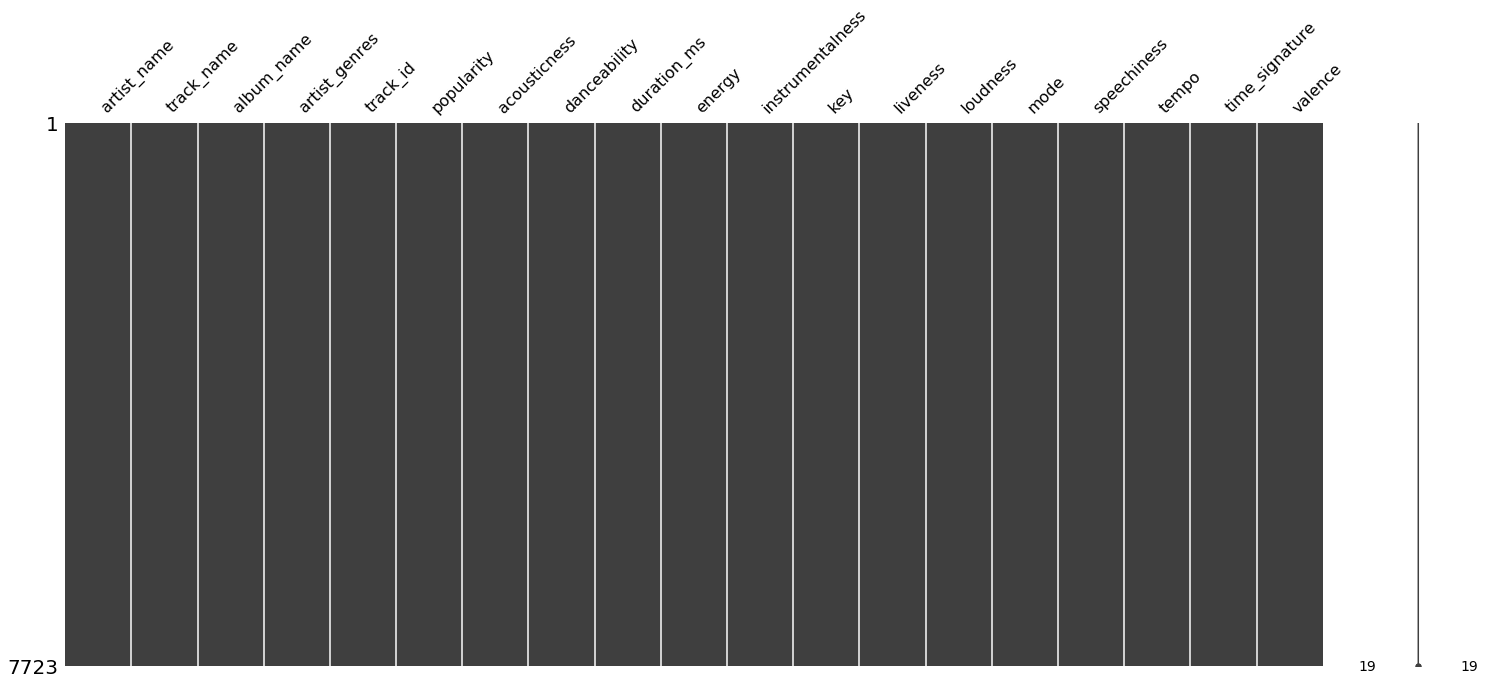

In [164]:
import missingno as msno
%matplotlib inline
msno.matrix(spotidata)

In [166]:
(spotidata.isna().sum()).sum()

0

In [137]:
spotidata.shape

(14838, 19)

In [138]:
spotidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14838 entries, 0 to 14837
Data columns (total 19 columns):
artist_name         14838 non-null object
track_name          14838 non-null object
album_name          14838 non-null object
artist_genres       14838 non-null object
track_id            14838 non-null object
popularity          14838 non-null int64
acousticness        14838 non-null float64
danceability        14838 non-null float64
duration_ms         14838 non-null int64
energy              14838 non-null float64
instrumentalness    14838 non-null float64
key                 14838 non-null int64
liveness            14838 non-null float64
loudness            14838 non-null float64
mode                14838 non-null int64
speechiness         14838 non-null float64
tempo               14838 non-null float64
time_signature      14838 non-null int64
valence             14838 non-null float64
dtypes: float64(9), int64(5), object(5)
memory usage: 2.3+ MB


In [140]:

# group the entries by artist_name and track_name and check for duplicates

grouped = spotidata.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

1879

In [142]:
#There are 1879 duplicate entries which will be dropped in this cell
spotidata.drop_duplicates(subset=['artist_name','track_name'], inplace=True)


In [147]:
# verify the dropping
spotidata[spotidata.duplicated(subset=['artist_name','track_name'],keep=False)].count()

artist_name         0
track_name          0
album_name          0
artist_genres       0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [144]:
spotidata.shape

(7723, 19)

In [149]:
spotidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 14837
Data columns (total 19 columns):
artist_name         7723 non-null object
track_name          7723 non-null object
album_name          7723 non-null object
artist_genres       7723 non-null object
track_id            7723 non-null object
popularity          7723 non-null int64
acousticness        7723 non-null float64
danceability        7723 non-null float64
duration_ms         7723 non-null int64
energy              7723 non-null float64
instrumentalness    7723 non-null float64
key                 7723 non-null int64
liveness            7723 non-null float64
loudness            7723 non-null float64
mode                7723 non-null int64
speechiness         7723 non-null float64
tempo               7723 non-null float64
time_signature      7723 non-null int64
valence             7723 non-null float64
dtypes: float64(9), int64(5), object(5)
memory usage: 1.2+ MB


In [115]:
spotidata[spotidata.duplicated(subset=['artist_name','track_name'],keep=False)]

,artist_name,track_name,album_name,artist_genres,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
2,YNW Melly,Murder On My Mind,I AM YOU,"[YNW Melly, [trap music]]",7eBqSVxrzQZtK2mmgRG6lC,88,0.14500,0.759,268434,0.730,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,0.740
3,Calboy,Envy Me,Envy Me,"[Calboy, [chicago rap, trap music]]",05t7JMip6JrLuSrMV5yYjX,86,0.28200,0.556,120137,0.481,0.000000,11,0.2160,-7.663,1,0.3130,149.025,4,0.581
8,21 Savage,a lot,i am > i was,"[21 Savage, [atl hip hop, rap, trap music]]",2t8yVaLvJ0RenpXUIAC52d,85,0.03950,0.837,288624,0.636,0.001250,1,0.3420,-7.643,1,0.0860,145.972,4,0.274
12,A Boogie Wit da Hoodie,Look Back At It,Hoodie SZN,"[A Boogie Wit da Hoodie, [rap, trap music]]",3Ol2xnObFdKV9pmRD2t9x8,85,0.40700,0.791,179449,0.587,0.000000,3,0.1480,-5.075,0,0.0413,96.057,4,0.536
22,benny blanco,Eastside (with Halsey & Khalid),Eastside (with Halsey & Khalid),"[benny blanco, [dance pop, pop, tropical house]]",0d2iYfpKoM0QCKvcLCkBao,86,0.55500,0.560,173800,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
27,Drake,Nonstop,Scorpion,"[Drake, [canadian hip hop, canadian pop, hip h...",0TlLq3lA83rQOYtrqBqSct,84,0.01640,0.912,238614,0.412,0.013000,7,0.1040,-8.074,1,0.1240,154.983,4,0.422
28,Cardi B,I Like It,Invasion of Privacy,"[Cardi B, [pop, rap]]",58q2HKrzhC3ozto2nDdN4z,86,0.09900,0.816,253390,0.726,0.000000,5,0.3720,-3.998,0,0.1290,136.048,4,0.650
29,Lil Mosey,Noticed,Northsbest,"[Lil Mosey, [rap conscient, trap music, vapor ...",6JQvHMSaR8flFsN53ypOfP,83,0.46200,0.699,165000,0.558,0.000000,11,0.1160,-7.622,1,0.0603,79.992,4,0.493
34,Lady Gaga,Shallow,A Star Is Born Soundtrack,"[Lady Gaga, [dance pop, pop], [fake]]",2VxeLyX666F8uXCJ0dZF8B,91,0.37100,0.572,215733,0.385,0.000000,7,0.2310,-6.362,1,0.0308,95.799,4,0.323
46,Luke Combs,She Got the Best of Me,This One's for You Too (Deluxe Edition),"[Luke Combs, [contemporary country, country ro...",698eQRku24PIYPQPHItKlA,78,0.02920,0.533,183160,0.907,0.000000,11,0.3860,-3.793,1,0.0406,150.990,4,0.700


In [135]:
print(spotipop.shape)
print(spotipop.info())
spotipop.head()

(7723, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 14837
Data columns (total 19 columns):
artist_name         7723 non-null object
track_name          7723 non-null object
album_name          7723 non-null object
artist_genres       7723 non-null object
track_id            7723 non-null object
popularity          7723 non-null int64
acousticness        7723 non-null float64
danceability        7723 non-null float64
duration_ms         7723 non-null int64
energy              7723 non-null float64
instrumentalness    7723 non-null float64
key                 7723 non-null int64
liveness            7723 non-null float64
loudness            7723 non-null float64
mode                7723 non-null int64
speechiness         7723 non-null float64
tempo               7723 non-null float64
time_signature      7723 non-null int64
valence             7723 non-null float64
dtypes: float64(9), int64(5), object(5)
memory usage: 1.2+ MB
None


,artist_name,track_name,album_name,artist_genres,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,"[Post Malone, [pop, rap]]",3KkXRkHbMCARz0aVfEt68P,94,0.55600,0.760,158040,0.479,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,Meek Mill,Going Bad (feat. Drake),Championships,"[Meek Mill, [hip hop, philly rap, pop, pop rap...",2IRZnDFmlqMuOrYOLnZZyc,89,0.25900,0.889,180522,0.496,0.000000,4,0.2520,-6.365,0,0.0905,86.003,4,0.544
2,YNW Melly,Murder On My Mind,I AM YOU,"[YNW Melly, [trap music]]",7eBqSVxrzQZtK2mmgRG6lC,88,0.14500,0.759,268434,0.730,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,0.740
3,Calboy,Envy Me,Envy Me,"[Calboy, [chicago rap, trap music]]",05t7JMip6JrLuSrMV5yYjX,86,0.28200,0.556,120137,0.481,0.000000,11,0.2160,-7.663,1,0.3130,149.025,4,0.581
4,Travis Scott,SICKO MODE,ASTROWORLD,"[Travis Scott, [pop, pop rap, rap]]",2xLMifQCjDGFmkHkpNLD9h,88,0.00513,0.834,312820,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


In [189]:
# with pd.option_context("display.max_rows", 200):
#     display(spotipop)

In [159]:
spotidata.to_csv('spotidata.csv', index=False) 

In [5]:
spotidata = pd.read_csv('spotidata.csv')

In [6]:
spotidata.head()

,artist_name,track_name,album_name,artist_genres,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,"['Post Malone', ['pop', 'rap']]",3KkXRkHbMCARz0aVfEt68P,94,0.55600,0.760,158040,0.479,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,Meek Mill,Going Bad (feat. Drake),Championships,"['Meek Mill', ['hip hop', 'philly rap', 'pop',...",2IRZnDFmlqMuOrYOLnZZyc,89,0.25900,0.889,180522,0.496,0.000000,4,0.2520,-6.365,0,0.0905,86.003,4,0.544
2,YNW Melly,Murder On My Mind,I AM YOU,"['YNW Melly', ['trap music']]",7eBqSVxrzQZtK2mmgRG6lC,88,0.14500,0.759,268434,0.730,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,0.740
3,Calboy,Envy Me,Envy Me,"['Calboy', ['chicago rap', 'trap music']]",05t7JMip6JrLuSrMV5yYjX,86,0.28200,0.556,120137,0.481,0.000000,11,0.2160,-7.663,1,0.3130,149.025,4,0.581
4,Travis Scott,SICKO MODE,ASTROWORLD,"['Travis Scott', ['pop', 'pop rap', 'rap']]",2xLMifQCjDGFmkHkpNLD9h,88,0.00513,0.834,312820,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


In [7]:
# create new dataframe df_pop ordered consisting of the 20 most popular tracks
df_pop = spotidata.sort_values('popularity', ascending=False).head(100)

In [9]:
df_pop.reset_index(inplace = True) 

In [10]:
df_pop.head()

,index,artist_name,track_name,album_name,artist_genres,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,"['Post Malone', ['pop', 'rap']]",3KkXRkHbMCARz0aVfEt68P,94,0.556,0.760,158040,0.479,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,62,Pedro Capó,Calma - Remix,Calma (Remix),"['Pedro Capó', ['latin pop']]",5iwz1NiezX7WWjnCgY5TH4,91,0.323,0.826,238200,0.773,0.000000,11,0.1430,-4.218,0,0.0524,126.899,4,0.761
2,34,Lady Gaga,Shallow,A Star Is Born Soundtrack,"['Lady Gaga', ['dance pop', 'pop'], ['fake']]",2VxeLyX666F8uXCJ0dZF8B,91,0.371,0.572,215733,0.385,0.000000,7,0.2310,-6.362,1,0.0308,95.799,4,0.323
3,5,Halsey,Without Me,Without Me,"['Halsey', ['dance pop', 'electropop', 'etherp...",5p7ujcrUXASCNwRaWNHR1C,91,0.297,0.752,201661,0.488,0.000009,6,0.0936,-7.050,1,0.0705,136.041,4,0.533
4,6,Marshmello,Happier,Happier,"['Marshmello', ['brostep', 'egyptian pop', 'pr...",2dpaYNEQHiRxtZbfNsse99,91,0.191,0.687,214290,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671


In [22]:
import ast

In [24]:
df_pop["artist_genres"] = df_pop["artist_genres"].apply(lambda x: ast.literal_eval(x))

In [19]:
df_pop2.artist_genres[0]

"['Post Malone', ['pop', 'rap']]"

In [25]:
df_pop.artist_genres[0]

['Post Malone', ['pop', 'rap']]

In [26]:
# flatten series with list values to multiple rows
df_pop2 = pd.DataFrame(df_pop.artist_genres.tolist(), index=df_pop["index"]).stack().reset_index(name="artist_genres")

In [27]:
df_pop2.head()

,index,level_1,artist_genres
0,0,0,Post Malone
1,0,1,"[pop, rap]"
2,62,0,Pedro Capó
3,62,1,[latin pop]
4,34,0,Lady Gaga


In [29]:
df_pop2.loc[df_pop2.level_1 == 0] 

,index,level_1,artist_genres
0,0,0,Post Malone
2,62,0,Pedro Capó
4,34,0,Lady Gaga
7,5,0,Halsey
9,6,0,Marshmello
11,54,0,Lewis Capaldi
13,13,0,Panic! At The Disco
15,1,0,Meek Mill
17,31,0,Alec Benjamin
19,10,0,Post Malone


In [ ]:
# we can create overlaid or side-by-side bargraph. You need to shift the x value by width to accommodate for two graphs.
from matplotlib import pyplot as plt
fig = plt.figure()
n = 1 # This is our first dataset (out of 2) 
t = 2 # Number of datasets 
d = 6 # Number of sets of bars 
w = 0.8 # Width of each bar 
dog_values = [t*element + w*n for element in range(d)] # essentially, this list comprehension gives us the position
# of the position of dogs
plt.bar(dog_values,dogs_age, color='green')
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
cat_values = [t*element + w*n for element in range(d)]
plt.bar(cat_values, cats_age, color = 'purple')
plt.legend(["track_name", "cats"])
n = 1

In [191]:
spotidata["artist_genres"]

0                                [Post Malone, [pop, rap]]
1        [Meek Mill, [hip hop, philly rap, pop, pop rap...
2                                [YNW Melly, [trap music]]
3                      [Calboy, [chicago rap, trap music]]
4                      [Travis Scott, [pop, pop rap, rap]]
5        [Halsey, [dance pop, electropop, etherpop, ind...
6        [Marshmello, [brostep, egyptian pop, progressi...
7                              [Juice WRLD, [chicago rap]]
8              [21 Savage, [atl hip hop, rap, trap music]]
9           [Khalid, [pop], [pakistani pop], [somali pop]]
10                               [Post Malone, [pop, rap]]
11                [XXXTENTACION, [emo rap, miami hip hop]]
12             [A Boogie Wit da Hoodie, [rap, trap music]]
13       [Panic! At The Disco, [emo, modern rock, pop p...
14       [Sheck Wes, [rap, trap music, underground hip ...
15       [Kodak Black, [miami hip hop, pop rap, rap, so...
16                             [Juice WRLD, [chicago rap

In [114]:
# sp.audio_features('spotify:track:2EGaDf0cPX789H3LNeB03D')[0]

In [ ]:
from __future__ import print_function    # (at top of module)
import time
import pandas as pd
import numpy as np
import re
import spotipy
import sys
import os
import json
import pprint
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import spotipy.util as util

cid ="ae0dc287abd746f9bfc9fabb30966d0c" 
secret = "40c2e16da28c49e1839219c99e697910"
username= "Mohamad Eldebek"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#user_id = []
track_name = []
track_id = []
artist_name = []
playlist_id = []
popularity = []
#playlist_id = []

# import timeit
# start = timeit.default_timer()

# for i in range(0,10000,50):
#     track_results = sp.search(q='year:2019', type='track', limit=50,offset=i)
#     for i, t in enumerate(track_results['tracks']['items']):
#         artist_name.append(t['artists'][0]['name'])
#         track_name.append(t['name'])
#         track_id.append(t['id'])
#         popularity.append(t['popularity'])
results = sp.search(q='kanye', limit=20)
        for i, t in enumerate(results['tracks']['items']):
            stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)
print(' ', i, t['name'])

In [15]:
print('number of elements in the track_results list:', len(track_id))

number of elements in the track_results list: 0


In [47]:
cid ="ae0dc287abd746f9bfc9fabb30966d0c" 
secret = "40c2e16da28c49e1839219c99e697910"
username= "Mohamad Eldebek"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

artist_name = []
track_name = []
track_id = [] 
popularity = []



for i in range(0,10000,50):
    track_results = sp.search(q='year:2018', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        
#         results = sp.search(q='kanye', limit=20)
# for i, t in enumerate(results['tracks']['items']):
#     print(' ', i, t['name'])

  0 Mixed Personalities (feat. Kanye West)
  1 I Love It (& Lil Pump)
  2 Gold Digger
  3 Stronger
  4 POWER
  5 Heartless
  6 All Mine
  7 MAMA (feat. Nicki Minaj, Kanye West)
  8 Father Stretch My Hands Pt. 1
  9 Ghost Town
  10 Waves
  11 All Of The Lights
  12 Black Skinhead
  13 All Falls Down
  14 Watch (feat. Lil Uzi Vert & Kanye West)
  15 Famous
  16 Yikes
  17 Ultralight Beam
  18 Runaway
  19 Violent Crimes


In [60]:
df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(10000, 4)


,artist_name,track_name,track_id,popularity
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,94
1,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,89
2,YNW Melly,Murder On My Mind,7eBqSVxrzQZtK2mmgRG6lC,88
3,Calboy,Envy Me,05t7JMip6JrLuSrMV5yYjX,86
4,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,88


In [63]:
df_tracks.to_csv('SpotifyPop.csv', index=False)

In [38]:
SpotifyPop = pd.read_csv('SpotifyPop.csv')

In [39]:
SpotifyPop.head()

,artist_name,track_name,track_id,popularity
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,94
1,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,89
2,YNW Melly,Murder On My Mind,7eBqSVxrzQZtK2mmgRG6lC,88
3,Calboy,Envy Me,05t7JMip6JrLuSrMV5yYjX,86
4,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,88


In [40]:
print('number of elements in the track_id list:', len(track_id))

number of elements in the track_id list: 10000


In [41]:
# group the entries by artist_name and track_name and check for duplicates

grouped = SpotifyPop.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

2136

In [42]:
SpotifyPop[SpotifyPop.duplicated(subset=['artist_name','track_name'],keep=False)].count()



artist_name    4786
track_name     4786
track_id       4786
popularity     4786
dtype: int64

In [43]:
grouped.head()

artist_name           track_name            
"Chicken Girls" Cast  Dancing on the Ceiling    1
"Weird Al" Yankovic   The Hamilton Polka        1
$NOT                  GOSHA                     2
$tupid Young          Trust Nobody              2
$uicideBoy$           10,000 Degrees            2
dtype: int64

In [44]:
SpotifyPop.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [45]:
SpotifyPop.count()

artist_name    7350
track_name     7350
track_id       7350
popularity     7350
dtype: int64

In [46]:
SpotifyPop[SpotifyPop.duplicated(subset=['artist_name','track_name'],keep=False)].count()


artist_name    0
track_name     0
track_id       0
popularity     0
dtype: int64

In [47]:
SpotifyPop.shape


(7350, 4)

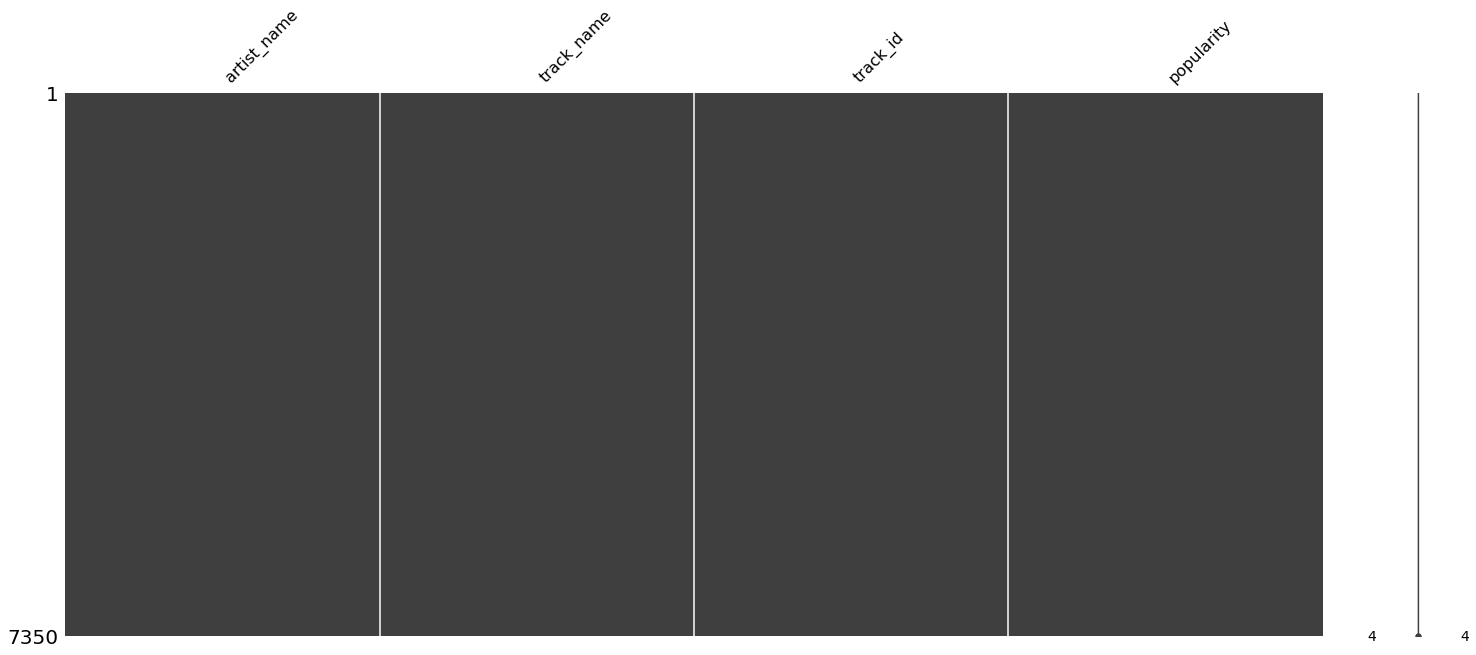

In [48]:
import missingno as msno
%matplotlib inline
msno.matrix(SpotifyPop)

In [51]:
# create new dataframe df_pop ordered consisting of the 100 most popular tracks
df_pop = SpotifyPop.sort_values('popularity', ascending=False).head(20)

In [52]:
df_pop

,artist_name,track_name,track_id,popularity
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,94
5,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,91
6,Marshmello,Happier,2dpaYNEQHiRxtZbfNsse99,91
31,Lady Gaga,Shallow,2VxeLyX666F8uXCJ0dZF8B,91
51,Lewis Capaldi,Someone You Loved,2TIlqbIneP0ZY1O0EzYLlc,90
12,Panic! At The Disco,High Hopes,1rqqCSm0Qe4I9rUvWncaom,89
1,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,89
28,Alec Benjamin,Let Me Down Slowly,2qxmye6gAegTMjLKEBoR3d,89
46,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4w8niZpiMy6qz1mntFA5uM,88
32,Bad Bunny,MIA (feat. Drake),116H0KvKr2Zl4RPuVBruDO,88


In [ ]:
# try to get a list of user ids
# save dataframe as csv
# do EDA

In [26]:
track_results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=year%3A2018&type=track&offset=9950&limit=50',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5TM9R6dNoJSMq23yZQD6Ee'},
       'href': 'https://api.spotify.com/v1/artists/5TM9R6dNoJSMq23yZQD6Ee',
       'id': '5TM9R6dNoJSMq23yZQD6Ee',
       'name': 'Don Q',
       'type': 'artist',
       'uri': 'spotify:artist:5TM9R6dNoJSMq23yZQD6Ee'}],
     'available_markets': ['AD',
      'AE',
      'AR',
      'AT',
      'AU',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HU',
      'ID',
      'IE',
      'IL',
      'IS',
      'IT',
      'JO',
      'JP',
      'KW',
      '

In [ ]:
cid ="ae0dc287abd746f9bfc9fabb30966d0c" 
secret = "40c2e16da28c49e1839219c99e697910"
username= "Mohamad Eldebek"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


results = sp.search(q='kanye', limit=20)
for i, t in enumerate(results['tracks']['items']):
    print(' ', i, t['name'])

In [ ]:
len(sys.argv)

In [ ]:
' '.join(sys.argv[:])

In [ ]:
artist_name = 'weezer'

results = sp.search(q=artist_name, limit=50)
tids = []
for i, t in enumerate(results['tracks']['items']):
    print(' ', i, t['name'])
    tids.append(t['uri'])

start = time.time()
features = sp.audio_features(tids)
delta = time.time() - start
for feature in features:
    print(json.dumps(feature, indent=4))
    print()
    analysis = sp._get(feature['analysis_url'])
    print(json.dumps(analysis, indent=4))
    print()
print ("features retrieved in %.2f seconds" % (delta,))

In [171]:
def API_get_albums(album_ids, album_data):
   

    alb_ids = ','.join(album_ids)

    url = 'https://api.spotify.com/v1/albums?ids=' + alb_ids
    r = requests.get(url)

    if r:
       j = r.json()
    else:
        return r


    ll = j['albums']
    
    try:
        for l in ll:
            k = [  l['id'], 
                   l['genres'],
                   l['popularity'],
                   l['release_date'] ]

            album_data.append(k)
    
    except:
        ValueError

In [174]:
API_get_albums(

NameError: name 'alb_ids' is not defined

In [ ]:
# The popularity of a track is a value between 0 and 100, with 100 being the most popular. 
# The popularity is calculated by algorithm and is based, in the most part, on the total number of plays 
# the track has had and how recent those plays are.
# Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were 
# played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. 
# Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may 
# lag actual popularity by a few days: the value is not updated in real time.

In [7]:

cid ="ae0dc287abd746f9bfc9fabb30966d0c" 
secret = "40c2e16da28c49e1839219c99e697910"
username= "Mohamad Eldebek"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

YWUwZGMyODdhYmQ3NDZmOWJmYzlmYWJiMzA5NjZkMGM6NDBjMmUxNmRhMjhjNDllMTgzOTIxOWM5OWU2OTc5MTAK

https://accounts.spotify.com/authorize
    
    
model = spotipy.Spotify(client_credentials_manager=client_cred_manager)
scope = 'user-library-read playlist-read-private'
#token = "Bearer BQBHbEieVIBtDz5QcD3M6LxfWXcscBYd7ZzStDjP_3wKHkEFjY4QqFV-82EcU-wNvBo_Fnawc7JMx9KDLx1WdaWj2gojr5RGZguzsyEPg5RkkBPLDbnum850dZ4e_xRu41DOWsfZWNBq1tlfzDkRF1j3SgPAs-0zFut3WCoj&refresh_token=AQCPILw9Y6szk_KjqSVIHueizz-AU4iEPZ2SnkxLhTjtlPgI3l0eh8As9tEcmq3RJoqEMYceU71bA-jeUeYWnUOo5WZCNgq9IQUB9CqPR0OwFwJUInJFNVuncqKeU6yddAY"
token = curl -H "Authorization: Basic ZjM...zE=" -d grant_type=authorization_code -d code=MQCbtKe...44KN -d redirect_uri=https%3A%2F%2Fwww.foo.com%2Fauth https://accounts.spotify.com/api/token

token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri= "http%3A%2F%2Fmeldebek.com%2Fcallback%2F")
if token:
    model = spotipy.Spotify(auth=token)
else:
    print("unable to get token for:", username)

In [18]:
credentials = oauth2.SpotifyClientCredentials(
        client_id=cid,
        client_secret=secret)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

# Main definition - constants
menu_actions  = {}

def main_menu():
    os.system('clear')
    
    print ("Welcome,\n")
    print ("Please choose the menu you want to start:")
    print ("1. Track")
    print ("2. Artist")
    print ("3. Album")
    print ("4. User")
    print ("\n0. Quit")
    choice = raw_input(" >>  ")
    print ("choice")
    exec_menu(choice, '0')
 
    return


# TRACK MENU
def track_menu():
    print ("TRACK MENU\n")
    print ("1. General Info")
    print ("2. Audio Features")
    print ("3. Audio Analysis")
    print ("9. Back")
    print ("0. Quit")
    choice = raw_input(" >>  ")
    exec_menu(choice, '1')
    return


def track_info():
    os.system('clear')
    track = raw_input(" >> Track name: ")
    results = spotify.search(q=track, limit=1)
    pprint.pprint(results)
    press_to_go_back(1)


def track_features():
    os.system('clear')
    track = raw_input(" >> Track name: ")
    results = spotify.search(q=track, limit=1)
    track_id = results['tracks']['items'][0]['id']
    pprint.pprint(spotify.audio_features([track_id]))
    press_to_go_back(1)


def track_analysis():
    os.system('clear')
    track = raw_input(" >> Track name: ")
    results = spotify.search(q=track, limit=1)
    track_id = results['tracks']['items'][0]['id']
    pprint.pprint(spotify.audio_analysis(track_id))
    press_to_go_back(1)
    
 # ARTIST MENU
def artist_menu():
    print ("ARTIST MENU\n")
    print ("1. General Info")
    print ("2. Albums")
    print ("3. Top Tracks")
    print ("4. Related Artists")
    print ("9. Back")
    print ("0. Quit" )
    choice = raw_input(" >>  ")
    exec_menu(choice, '2')
    return


def artist_info():
    os.system('clear')
    artist = raw_input(" >> Artist name: ")
    results = spotify.search(q=artist, limit=1, type='artist')
    pprint.pprint(results)
    press_to_go_back(2)


def artist_albums():
    os.system('clear')
    artist = raw_input(" >> Artist name: ")
    results = spotify.search(q=artist, limit=1, type='artist')
    artist_id = results['artists']['items'][0]['id']
    pprint.pprint(spotify.artist_albums(artist_id, album_type='album'))
    press_to_go_back(2)


def artist_top_tracks():
    os.system('clear')
    artist = raw_input(" >> Artist name: ")
    results = spotify.search(q=artist, limit=1, type='artist')
    artist_id = results['artists']['items'][0]['id']
    pprint.pprint(spotify.artist_top_tracks(artist_id, country='PT'))
    press_to_go_back(2)


def artist_related_artists():
    os.system('clear')
    artist = raw_input(" >> Artist name: ")
    results = spotify.search(q=artist, limit=1, type='artist')
    artist_id = results['artists']['items'][0]['id']
    pprint.pprint(spotify.artist_related_artists(artist_id))
    press_to_go_back(2)


# ALBUM MENU
def album_menu():
    print ("ALBUM MENU\n")
    print ("1. General Info")
    print ("2. Album Tracks")
    print ("9. Back")
    print ("0. Quit") 
    choice = raw_input(" >>  ")
    exec_menu(choice, '3')
    return


def album_info():
    os.system('clear')
    album = raw_input(" >> Album name: ")
    results = spotify.search(q=album, limit=1, type='album')
    pprint.pprint(results)
    press_to_go_back(3)


def album_tracks():
    os.system('clear')
    album = raw_input(" >> Album name: ")
    results = spotify.search(q=album, limit=1, type='album')
    album_id = results['albums']['items'][0]['id']
    pprint.pprint(spotify.album_tracks(album_id))
    press_to_go_back(3)


# USER MENU
def user_menu():
    print ("USER MENU\n")
    print ("1. Top Tracks")
    print ("2. Top Artists")
    print ("3. Recently Played Tracks")
    print ("4. Reset User")
    print ("9. Back")
    print ("0. Quit\n" )
    choice = raw_input(" >>  ")
    exec_menu(choice, '4')
    return


def user_top_tracks():
    os.system('clear')
    limit = 50 # default limit = 20
    username = 'top'
    scope = 'user-top-read'
    token = util.prompt_for_user_token(username, scope,client_id=CLIENT_ID,client_secret=CLIENT_SECRET,redirect_uri=REDIRECT_URI)
    spotify = spotipy.Spotify(auth=token)
    results = spotify.current_user_top_tracks(limit=limit, time_range='long_term')
    # pprint.pprint(results)

    for i in range(0, limit):
        print str(i+1) + ". " + results['items'][i]['artists'][0]['name'] + ' - ' + results['items'][i]['name']
    press_to_go_back(4)


def user_top_artists():
    os.system('clear')
    limit = 50
    username = 'top'
    scope = 'user-top-read'
    token = util.prompt_for_user_token(username, scope,client_id=CLIENT_ID,client_secret=CLIENT_SECRET,redirect_uri=REDIRECT_URI)
    spotify = spotipy.Spotify(auth=token)
    results = spotify.current_user_top_artists(limit=limit, time_range='long_term')
    # pprint.pprint(results)

    for i in range(0, len(results['items'])):
        print str(i+1) + ". " + results['items'][i]['name']
    press_to_go_back(4)


def user_recent_tracks():
    os.system('clear')
    limit = 20
    username = 'recent'
    scope = 'user-read-recently-played'
    token = util.prompt_for_user_token(username, scope,client_id=CLIENT_ID,client_secret=CLIENT_SECRET,redirect_uri=REDIRECT_URI)
    spotify = spotipy.Spotify(auth=token)
    results = spotify.current_user_recently_played(limit=limit)
    # pprint.pprint(results)

    for i in range(0, limit):
        print results['items'][i]['track']['artists'][0]['name'] + ' - ' + results['items'][i]['track']['name']
    press_to_go_back(4)


def reset_user():
    os.system('clear')
    dir_name = os.path.dirname(os.path.realpath(__file__))
    file_list = os.listdir(dir_name)
    flag = 0

    for item in file_list:
        if item.startswith('.cache'):
            os.remove(os.path.join(dir_name, item))
            flag = 1
    
    if flag:
        print "User(s) removed with success!"
    press_to_go_back(4)


def exec_menu(choice, menu_id):
    os.system('clear')
    ch = choice.lower()
    if ch == '':
        menu_actions['main_menu']()
    else:
        try:
            menu_actions[menu_id][ch]()
        except KeyError:
            print "Invalid selection, please try again.\n"
            menu_actions[menu_id]['menu']()
    return


def press_to_go_back(menu_id):
    raw_input(">> Press to go back to menu")
    os.system('clear')
    menu_actions[str(menu_id)]['menu']()


# Back to main menu
def back():
    menu_actions['0']['menu']()

 # Exit program
def exit():
    sys.exit()


# Menu definition
menu_actions = {
    '0' : {
        'menu': main_menu,
        '1': track_menu,
        '2': artist_menu,
        '3': album_menu,
        '4': user_menu,
        '9': back,
        '0': exit,
    },
    '1' : {
        'menu': track_menu,
        '1': track_info,
        '2': track_features,
        '3': track_analysis,
        '9': back,
        '0': exit,
    },
    '2' : {
        'menu': artist_menu,
        '1': artist_info,
        '2': artist_albums,
        '3': artist_top_tracks,
        '4': artist_related_artists,
        '9': back,
        '0': exit,
    },
    '3' : {
        'menu': album_menu,
        '1': album_info,
        '2': album_tracks,
        '9': back,
        '0': exit,
    },
    '4' : {
        'menu': user_menu,
        '1': user_top_tracks,
        '2': user_top_artists,
        '3': user_recent_tracks,
        '4': reset_user,
        '9': back,
        '0': exit,
    },
}


if __name__ == '__main__':
    main_menu()

SyntaxError: invalid syntax (<ipython-input-18-99ab7f4ffa52>, line 169)